# Class 28 - Maximum Flow

Define an adjacency matrix for a simple directed graph with six vertices, as shown here:

In [1]:
import numpy
vertex_names = ["A","B","C","D","E","X"]
N = len(vertex_names)
network = numpy.zeros([N, N])
network[0,5] = 1
network[0,4] = 1
network[3,4] = 1
network[0,1] = 1
network[0,2] = 1
network[2,5] = 1
network[4,5] = 1

Make an igraph graph out of this adjacency matrix, and print the graph and its summary:

IGRAPH D--- 6 7 -- 
+ attr: label (v)


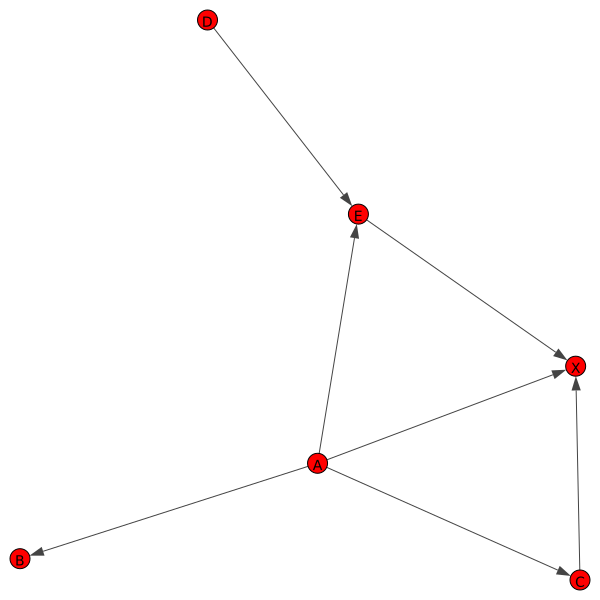

In [2]:
import igraph
import cairo
network_igraph = igraph.Graph.Adjacency(network.tolist())
network_igraph.vs["label"] = vertex_names
print(network_igraph.summary())
layout = network_igraph.layout_kamada_kawai()
igraph.plot(network_igraph, vertex_label=vertex_names)

Using the `Graph.maxflow` function, compute the max-flow between all possible pairs of distinct vertices. Which pair of vertices have the maximum flow between them? 

In [3]:
maxflow_values = []
maxflow_labels = []
for i in range(0, N):
    for j in range(0, N):
        if i == j:
            continue
        pair_label = vertex_names[i] + "_to_" + vertex_names[j]
        maxflow_value = network_igraph.maxflow(source=i, target=j)
        maxflow_values.append(maxflow_value.value)
        maxflow_labels.append(pair_label)
ind_max = maxflow_values.index(max(maxflow_values))
print("Maximum flow value is: " + str(maxflow_values[ind_max]) + "; for pair of vertices: " + maxflow_labels[ind_max])

Maximum flow value is: 3.0; for pair of vertices: A_to_X


And here is how one would do it using a functional programming style, without a for loop:

In [58]:
combinations = [(i,j) for i in range(0,N) for j in range(0,N)]

def analyze_pair(pair):
    i = pair[0]
    j = pair[1]
    if i == j:
            return None
    pair_label = vertex_names[i] + "_to_" + vertex_names[j]
    maxflow_value = network_igraph.maxflow(source=i, target=j).value
    #return maxflow_value
    return {pair_label: maxflow_value}

from functools import reduce
reduce(lambda dict1, dict2: dict1 if next(iter(dict1.values())) > next(iter(dict2.values())) else dict2, filter(None, map(analyze_pair, combinations)))

{'A_to_X': 3.0}